In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [106]:
def process_image(image_path):
    test_hard3 = cv2.imread(image_path)

    gray = cv2.cvtColor(test_hard3, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (19, 19), 0)

    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    thresh = cv2.bitwise_not(thresh)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 6)) # dikey çizgileri birleştirmek için 1,6
    closed_image = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contour_image = np.zeros_like(gray)  # Create a blank image (same size as gray)
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness = cv2.FILLED)  # Draw contours in white

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(contour_image, 8, cv2.CV_32S)
    connected_component_image = labels.copy()
    filtered_components = np.zeros(contour_image.shape, dtype=np.uint8)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] > 1100:
            filtered_components[labels == i] = 255

    kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT, (19, 19)) # dikey çizgileri birleştirmek için
    open_image = cv2.morphologyEx(filtered_components, cv2.MORPH_OPEN, kernel_2)

    num_labels_2, labels_2, stats_2, centroids_2 = cv2.connectedComponentsWithStats(open_image, 8, cv2.CV_32S)
    connected_component_image_2 = labels_2.copy()
    filtered_components_2 = np.zeros(open_image.shape, dtype=np.uint8)

    extracted_components = np.zeros_like(gray)

    for i in range(1, num_labels_2):
        ratio = stats_2[i, cv2.CC_STAT_WIDTH] / stats_2[i, cv2.CC_STAT_HEIGHT]

        if 2 < ratio < 4:
            filtered_components_2[labels_2 == i] = 255
            print(ratio)
            component_mask = (labels_2 == i)

            extracted_component = gray * component_mask
            sum_of_component = np.sum(extracted_component)
            mean = sum_of_component / stats_2[i, cv2.CC_STAT_AREA]
            print("mean", mean)
            if mean > 80:
                extracted_components += extracted_component

    return extracted_components


2.1791044776119404
mean 38.76621740773397
2.6333333333333333
mean 70.50362844702467
2.032258064516129
mean 133.05610021786492
2.5306122448979593
mean 103.06231988472622
2.6944444444444446
mean 23.327768014059753


libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


3.2753623188405796
mean 90.39981447124305
3.647727272727273
mean 99.5261689291101
3.7142857142857144
mean 18.488494411571335
2.3513513513513513
mean 62.92830445124023
2.43859649122807
mean 68.71766897285791
2.689655172413793
mean 46.48190750059909
2.5714285714285716
mean 86.6841155234657
2.607142857142857
mean 80.57120743034056
2.1470588235294117
mean 64.06797776827705
2.98
mean 100.04072077185018


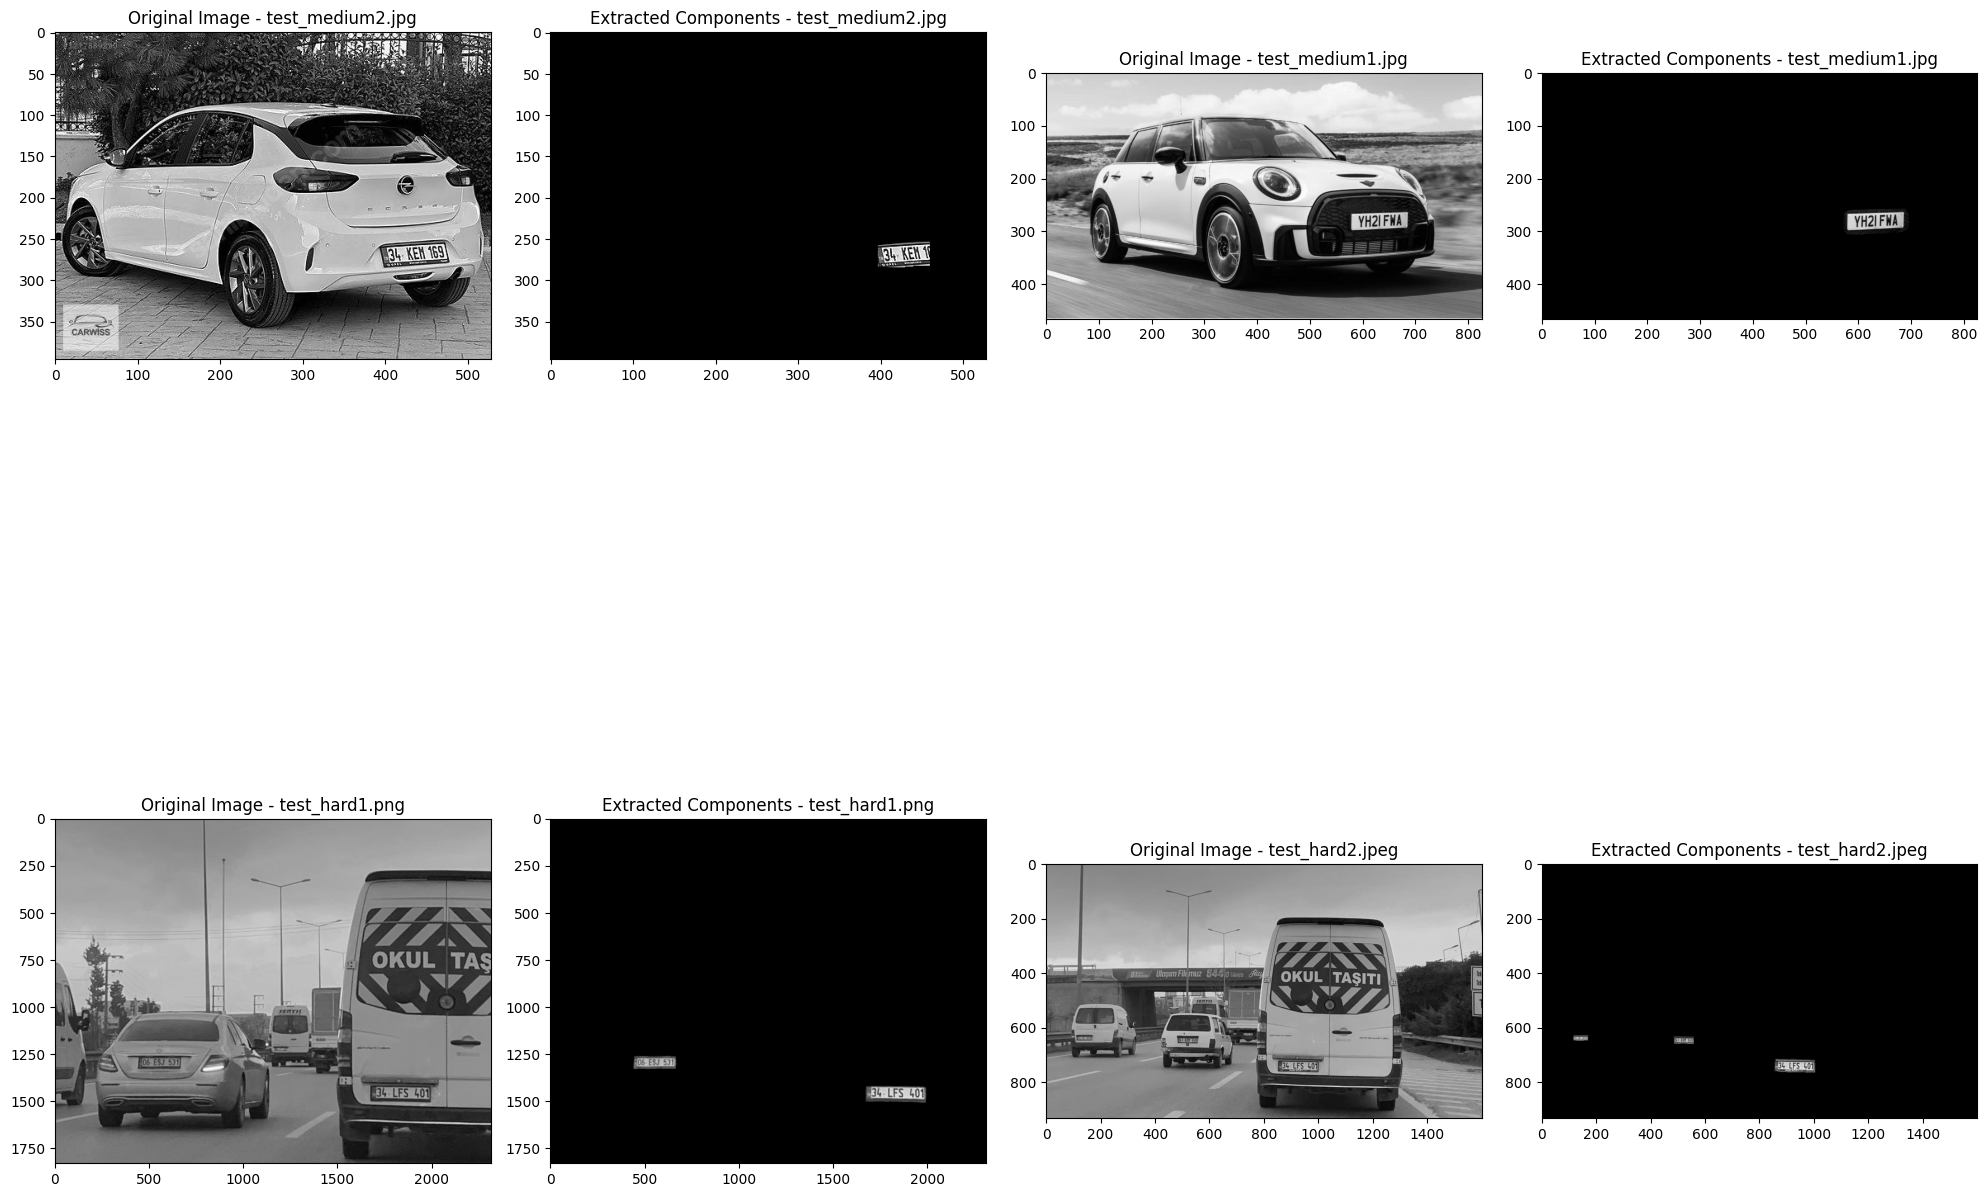

2.6289308176100628
mean 58.87548469709813
3.71875
mean 73.06814210832847
2.830188679245283
mean 72.73867943347297
3.5760869565217392
mean 102.37743162470566
3.6377952755905514
mean 82.85425497228562
3.515463917525773
mean 145.30273509423856
2.3548387096774195
mean 72.6424789410349
2.9523809523809526
mean 79.17532467532467
2.761904761904762
mean 78.64340425531915
3.0161290322580645
mean 103.95282586791242


libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


2.643979057591623
mean 72.33942295772901


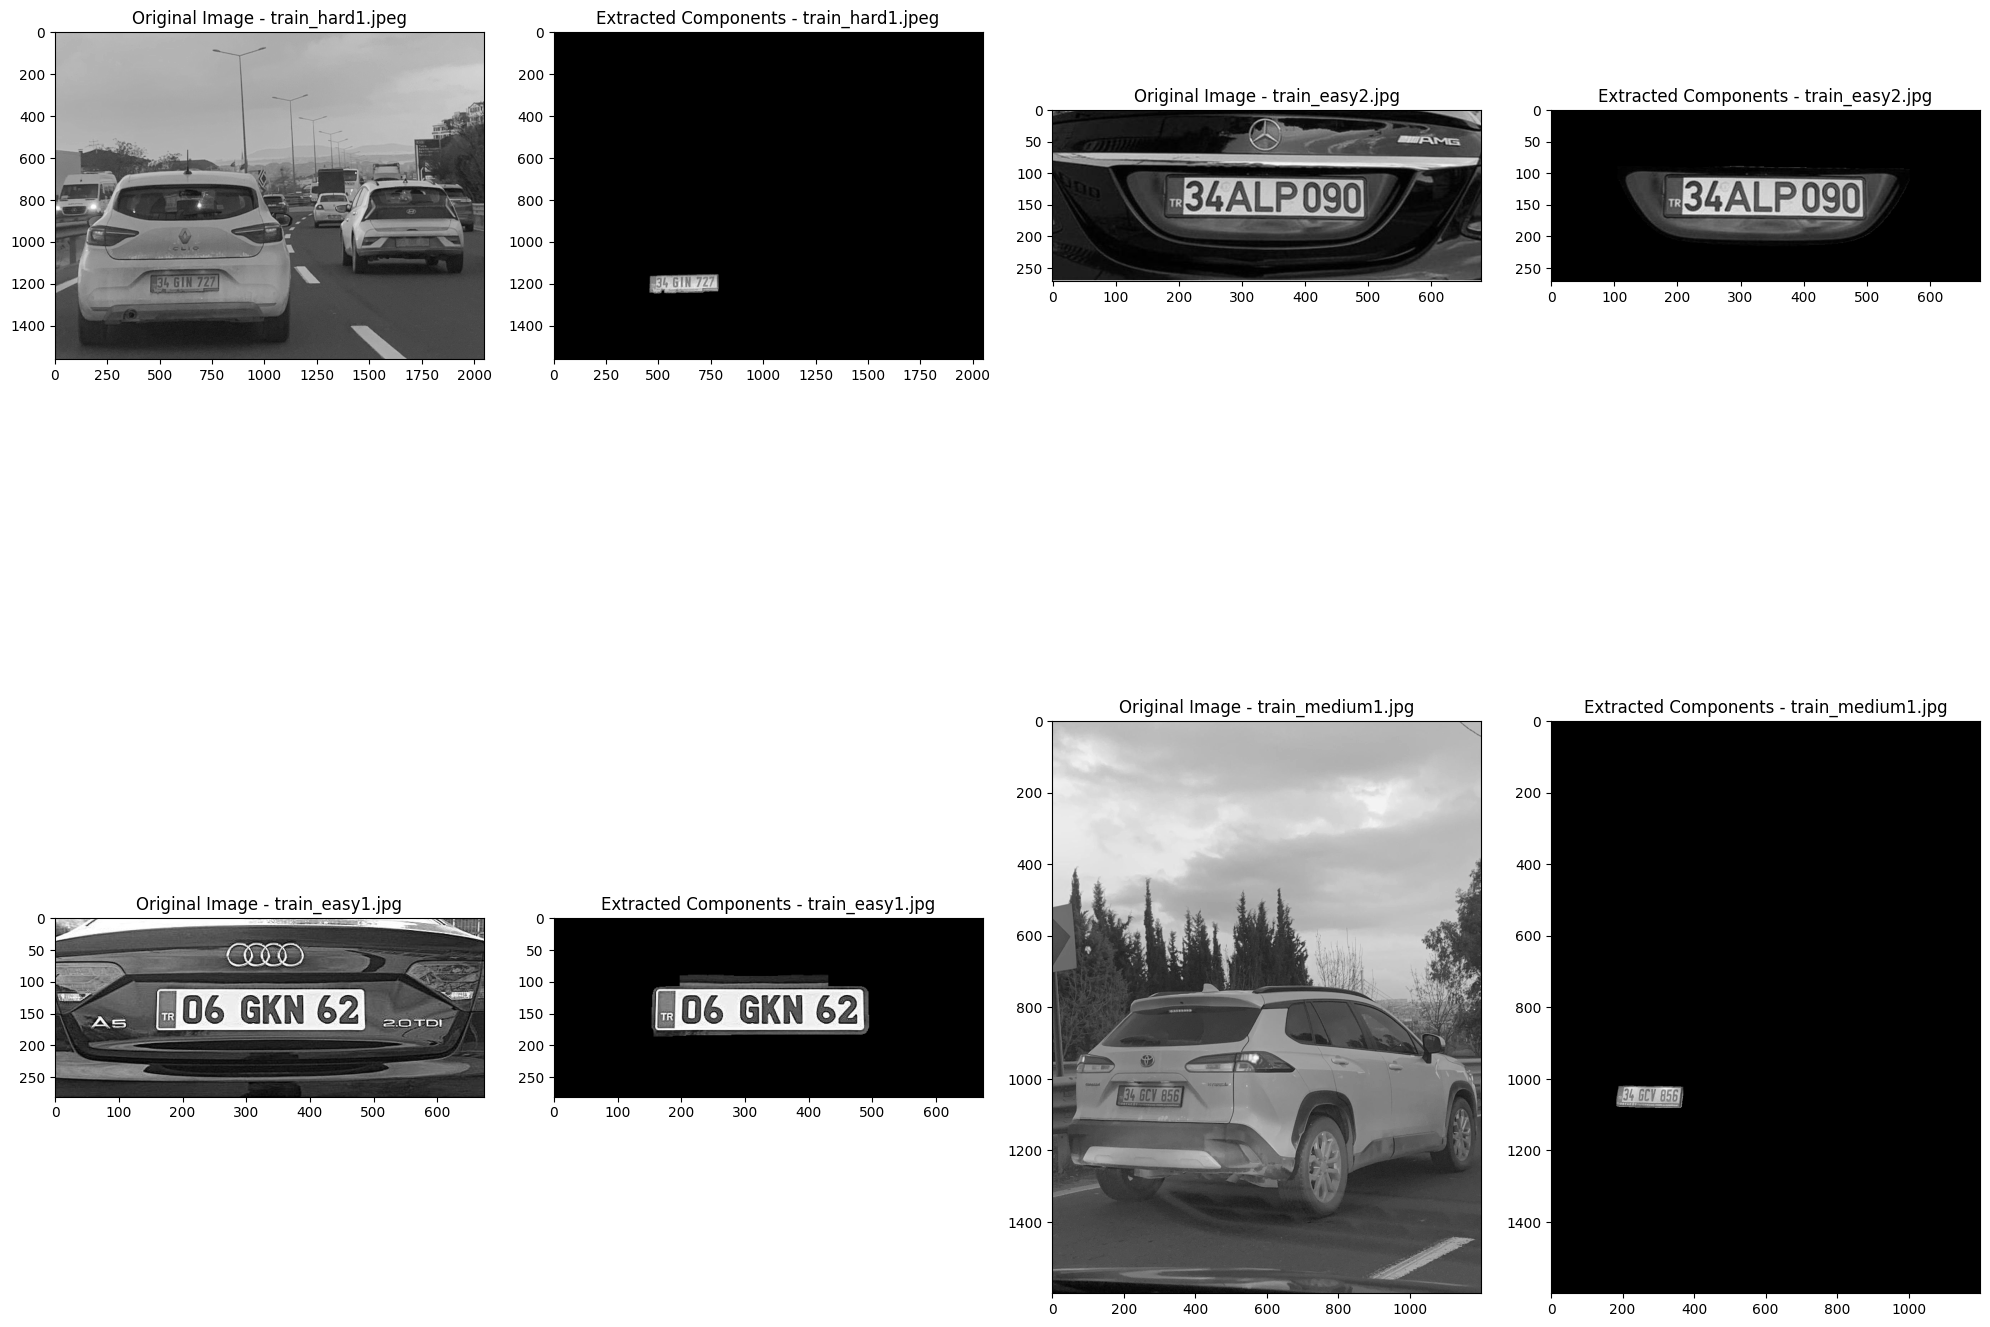

In [112]:
def plot_extracted_components(folder_path):
    images = []
    extracted_images = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(folder_path, filename)
            original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            extracted_components = process_image(image_path)
            images.append(original_image)
            extracted_images.append(extracted_components)
            filenames.append(filename)
    
    num_images = len(images)
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
    axes = axes.flatten()
    
    for i in range(min(num_images, 4)):
        axes[2*i].imshow(images[i], cmap='gray')
        axes[2*i].set_title(f"Original Image - {filenames[i]}")
        
        axes[2*i + 1].imshow(extracted_images[i], cmap='gray')
        axes[2*i + 1].set_title(f"Extracted Components - {filenames[i]}")
    
    plt.tight_layout()
    plt.show()


# Plot extracted components for images in 'test_images' folder
plot_extracted_components('images_gray/test_images/')

# Plot extracted components for images in 'train_images' folder
plot_extracted_components('images_gray/train_images/')